In [453]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum
import scipy
import pandas as pd
import numpy as np
import os

In [454]:
from pulp import LpMinimize

model = LpProblem(name="profit-optimization", sense=LpMinimize)

In [455]:
# 读取Excel文件
df1 = pd.read_excel('/home/maxdmx/math-China/附件1(1).xlsx')
column_name_1 = '地块名称'
column_data_1 = df1[column_name_1].tolist()

df2 = pd.read_excel('/home/maxdmx/math-China/附件1(2).xlsx')
column_name_2 = '作物名称'
column_data_2 =df2[column_name_2].tolist()
column_data_2

['黄豆',
 '黑豆',
 '红豆',
 '绿豆',
 '爬豆',
 '小麦',
 '玉米',
 '谷子',
 '高粱',
 '黍子',
 '荞麦',
 '南瓜',
 '红薯',
 '莜麦',
 '大麦',
 '水稻',
 '豇豆',
 '刀豆',
 '芸豆',
 '土豆',
 '西红柿',
 '茄子',
 '菠菜 ',
 '青椒',
 '菜花',
 '包菜',
 '油麦菜',
 '小青菜',
 '黄瓜',
 '生菜 ',
 '辣椒',
 '空心菜',
 '黄心菜',
 '芹菜',
 '大白菜',
 '白萝卜',
 '红萝卜',
 '榆黄菇',
 '香菇',
 '白灵菇',
 '羊肚菌']

In [456]:
years = [1,2,3,4,5,6,7]  # 2024到2030年
seasons = [1, 2]  # 两个种植季节
crops = list(range(1, 42))  # 41种作物
fields = list(range(1, 55))  # 54块地

In [457]:


# 定义决策变量，X[i][j][k] 表示第 i 作物在第 j 地块的第 k 季度种植面积
X = LpVariable.dicts("X", (crops, fields, seasons, years), lowBound=0, cat='Continuous')

In [458]:
df3 = pd.read_excel('/home/maxdmx/math-China/附件2(2)1.xlsx')

npyields = np.zeros((42,55,3))
npcosts = np.zeros((42,55,3))
# 遍历每一行并提取所需的列
for index, row in df3.iterrows():
    crop_id = row['作物编号']        # 提取作物编号
    plot_type = row['地块类型']      # 提取地块类型
    planting_season = row['种植季次']  # 提取种植季次
    yield_per_acre = row['亩产量/斤']  # 提取亩产量
    cost_per_acre = row['种植成本/(元/亩)']
    if plot_type == '平旱地':
        listtemp1=[1,2,3,4,5,6]
    elif plot_type == '梯田':
        listtemp1=[7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    elif plot_type == '山坡地':
        listtemp1=[21,22,23,24,25,26]
    elif plot_type == '水浇地':
        listtemp1=[27,28,29,30,31,32,33,34]
    elif plot_type == '普通大棚':
        listtemp1=[35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
    elif plot_type == '智慧大棚':
        listtemp1=[51,52,53,54]

    if planting_season=='单季' or planting_season=='第一季':
        ps=1
    else:
        ps=2
    for t in listtemp1:
        npyields[crop_id,t,ps]=yield_per_acre
        npcosts[crop_id,t,ps]=cost_per_acre
costs=npcosts.tolist()
yields=npyields.tolist()

In [459]:

df4 = pd.read_excel('/home/maxdmx/math-China/Ec.xlsx')

column_name_3 = '作物编号'
column_name_4 = '2023总产量'
column_data_3 = df4[column_name_3].tolist()
column_data_4 = df4[column_name_4].tolist()
npexpected_sales=np.zeros(42)
for i,j in zip(column_data_3,column_data_4):
    npexpected_sales[i]=j
expected_sales=npexpected_sales.tolist()

In [460]:
df5 = pd.read_excel('/home/maxdmx/math-China/updated_附件2(2)1.xlsx')
column_name_5 = '作物编号'
column_name_6 = '销售单价平均值/(元/斤)'
column_data_5 = df5[column_name_5].tolist()
column_data_5 = column_data_5[:-18]
column_data_6 = df5[column_name_6].tolist()
column_data_6 = column_data_6[:-18]
npprices=np.zeros(42)
for i,j in zip(column_data_5,column_data_6):
    npprices[i]=j
prices=npprices.tolist()

In [461]:
df6 = pd.read_excel('./23年数据.xlsx')
# 提取各列数据
column_name_7 = '作物编号'
column_data_7 = df6[column_name_7].tolist()
column_name_8 = '种植地块'
column_data_8 = df6[column_name_8].tolist()
column_name_9 = '季节编号'
column_data_9 = df6[column_name_9].tolist()
column_name_10 = '种植面积/亩'
column_data_10 = df6[column_name_10].tolist()

nparea23=np.zeros((42,55,3))
for i,j,k,m in zip(column_data_7,column_data_8,column_data_9,column_data_10):
    nparea23[i,j,k]=m
area23=nparea23.tolist()
area23

[[[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0,

In [462]:
import random

#亩产量的波动
#yields亩产量
#prices售价
#costs成本
#x亩数
yields1 = yields.copy()
print(yields1)
costs1 = npcosts.copy()
prices1 = prices.copy()
# 使用嵌套列表来构建42*55*3的三维数组，初始值可以设置为0或其他值
sales = [[[0.9 for _ in range(3)] for _ in range(55)] for _ in range(42)]
sales1=sales.copy()
def get_fluctuation_yield(yields,c,l,s):
    yields[c][l][s] = yields[c][l][s]*(1+random.uniform(-0.1, 0.1))
    yields1[c][l][s] = yields[c][l][s]
    return yields[c][l][s]
def get_fluctuation_sales(sales,c,l,s):
    if c == 6 or c == 7:
        sales[c][l][s] = sales[c][l][s]*(1+random.uniform(0.05*0.9, 0.1*0.9))
        sales1[c][l][s] = sales[c][l][s]
    else:
        sales[c][l][s] = sales[c][l][s]*(1+random.uniform(-0.05*0.9, +0.05*0.9))
        sales1[c][l][s] = sales[c][l][s]
    return sales[c][l][s]

def get_fluctuation_cost(costs,c,l,s):
    costs[c][l][s] = costs[c][l][s]*1.05
    costs1[c][l][s] = costs[c][l][s]
    return costs[c][l][s]
    
def get_fluctuation_prices(prices,c):
    if c<=37 and c>=17:
        prices[c]=prices[c]*1.05
        prices1[c] = prices[c]
    elif c<=40 and c>=38:
        prices[c]=prices[c]*(1+random.uniform(-0.05, -0.01))
        prices1[c] = prices[c]
        
    elif c==41:
        prices[c]=prices[c]*0.95
        prices1[c] = prices[c]
    return prices[c]

[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0], [0.0, 400.0, 0.0], [0.0, 400.0, 0.0], [0.0, 

In [463]:
# 目标函数1: 滞销浪费情况下的利润最大化
# model += lpSum([lpSum([0.9*lpSum([lpSum([yields1 [c][l][s] * X[c][l][s][y] for l in fields]) for s in seasons])*prices1[c]-lpSum([lpSum([costs1[c][l][s] * X[c][l][s][y] for l in fields]) for s in seasons])for c in crops])for y in years])

In [464]:
model += lpSum([lpSum([lpSum([lpSum([get_fluctuation_sales(sales,c,l,s)*get_fluctuation_yield(yields,c,l,s) * X[c][l][s][y] for l in fields]) for s in seasons])*get_fluctuation_prices(prices,c)-lpSum([lpSum([get_fluctuation_cost(costs,c,l,s) * X[c][l][s][y] for l in fields]) for s in seasons])for c in crops])for y in years])

In [465]:
data = pd.read_excel('/home/maxdmx/math-China/附件1(1).xlsx')
field_areas = data['地块面积/亩'].to_numpy()
field_areas = np.insert(field_areas, 0, 0)
field_areas

array([ 0. , 80. , 55. , 35. , 72. , 68. , 55. , 60. , 46. , 40. , 28. ,
       25. , 86. , 55. , 44. , 50. , 25. , 60. , 45. , 35. , 20. , 15. ,
       13. , 15. , 18. , 27. , 20. , 15. , 10. , 14. ,  6. , 10. , 12. ,
       22. , 20. ,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,
        0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6])

In [466]:
# 约束条件1: 作物种植面积不能超过地块总面积

for y in years:
    for s in seasons:
        for l in fields:
            model += lpSum([X[c][l][s][y] for c in crops]) <= field_areas[l]
            

# for y in years:
#         for c in crops:
#             model +=lpSum([lpSum([X[c][l][s][y]for s in seasons]) for l in fields]) <=260

for y in years:
        for c in crops:
            model += lpSum([lpSum([yields[c] [l][s] * X[c][l][s][y] for l in fields]) for s in seasons])<=1.2*expected_sales[c]

In [467]:
# 约束条件2: 每个地块三年内至少种一次豆类作物
beans1 = [1, 2, 3, 4, 5]
for l in range(1,27):
    for y in years[:-2]:
        model += lpSum([lpSum([X[bean][l][1][y + i] for i in range(0,3)])for bean in beans1])>=field_areas[l]
beans2 = [16,17,18]
for l in range(27,55):
    for y in years[:-2]:
        model += lpSum([lpSum([lpSum([X[bean][l][s][y + i]for i in range(0,3)]) for bean in beans2]) for s in seasons])>=field_areas[l]
        
        
beans1 = [1, 2, 3, 4, 5]
for l in range(1,27):
    model += lpSum([area23[bean][l][1]+X[bean][l][1][1]+X[bean][l][1][2]for bean in beans1])>=field_areas[l]
beans2 = [16,17,18]
for l in range(27,55):
    for y in years[:-2]:
        model += lpSum([lpSum([area23[bean][l][s]+X[bean][l][s][1]+X[bean][l][s][2] for bean in beans2]) for s in seasons])>=field_areas[l]

# # 约束条件2: 每个地块三年内至少种一次豆类作物
# beans = [1, 2, 3, 4, 5, 17, 18, 19] 
# for l in fields:
#     for s in seasons:
#         for y in years[:-2]:
#             model += lpSum([X[bean][l][s][y + i] for bean in beans for i in range(3)])>=field_areas[l]


# beans = [1, 2, 3, 4, 5, 17, 18, 19]
# for l in fields:
#      model += lpSum([X[bean][l][s][y] for bean in beans for s in seasons for y in years if y in range(years[0], years[-1]+3)]) >= field_areas[l]

In [468]:
#约束条件4:种植面积不能太小
#定义B数组           
B = LpVariable.dicts("B", (crops, fields, seasons, years), cat = 'Binary')
# 
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                if X[c][l][s][y] >= 0.001:
                    B[c][l][s][y] = 1
                else:
                    B[c][l][s][y] = 0

for l in fields:
    for s in seasons:
        for y in years:
            model+= lpSum([X[c][l][s][y]*B[c][l][s][y] for c in crops])>=0.3

In [469]:
# 约束条件3: 分散性约束，某个作物不能在太多地块种植
max_field_count = 6  # 每个作物每季最多种6个地块
for y in years:
    for s in seasons:
        for c in crops:
            model += lpSum([B[c][l][s][y] for l in fields]) <= max_field_count

In [470]:
# 约束条件5:轮作约束
# 对于平旱地
# for c in range(1,16):
#     for l in range(1,27):
#         for y in range(1,8):
#             model += X[c][l][1][y]*X[c][l][1][y+1] == 0
# #对于智慧大棚
# for c in range(1,16):
#     for l in range(51,55):
#         for y in range(1,8):
#             model += X[c][l][1][y]*X[c][l][1][y+1] +X[c][l][2][y]*X[c][l][2][y+1] == 0

# 约束条件5:轮作约束
# 对于平旱地
# for c in range(1,16):
#     for l in range(1,27):
#         for y in range(1,7):
#             model += X[c][l][1][y]+X[c][l][1][y+1] <= field_areas[l]
# # #对于智慧大棚
# for c in range(1,16):
#     for l in range(51,55):
#         for y in range(1,7):
#             model += X[c][l][1][y]+X[c][l][1][y+1] +X[c][l][2][y]+X[c][l][2][y+1] <=field_areas[l]

# 约束条件5:轮作约束
# 对于平旱地
for c in range(1,16):
    for l in range(1,27):
        for y in range(1,7):
            model += X[c][l][1][y]+X[c][l][1][y+1] <= field_areas[l]
# #对于智慧大棚
for c in range(17,35):
    for l in range(51,55):
        for y in range(1,7):
            model += X[c][l][1][y]+X[c][l][2][y+1] <=field_areas[l]
            model+=  X[c][l][2][y]+X[c][l][1][y+1] <=field_areas[l]
            model+=  X[c][l][1][y]+X[c][l][1][y+1] <=field_areas[l]

for c in range(1,16):
    for l in range(1,27):
        model += area23[c][l][1]+X[c][l][1][1] <= field_areas[l]

for c in range(17,35):
    for l in range(51,55):
        model += area23[c][l][1]+X[c][l][2][1] <=field_areas[l]
        model+=  X[c][l][2]+X[c][l][1][1] <=field_areas[l]
        model+=  X[c][l][1]+X[c][l][1][1] <=field_areas[l]


# # 对于平旱地，作物 1-15, 地块 1-26, 限制相邻年份的同一地块不种同一作物
# for c in range(1, 16):  # 作物范围
#     for l in range(1, 27):  # 地块范围
#         for y in range(1, 6):  # 年份范围，注意 y+1 不能超出范围
#             # 添加约束：相邻年份不能种植相同作物
#             model += lpSum([B[c][l][ 1][y+i] for i in (0,2) ]) <= 1
# 
# # 对于智慧大棚，作物 1-15, 地块 51-54, 限制相邻年份的同一地块不种同一作物
# for c in range(1, 16):  # 作物范围
#     for l in range(51, 55):  # 智慧大棚地块范围
#         for y in range(1, 7):  # 年份范围
#             # 添加约束：相邻年份的任一季节不能种植相同作物
#             model += lpSum([B[c][l][ s][y] for s in seasons ]) <= 1

In [471]:
# 种植类别约束
# 对于平旱地，梯田，山坡:
for c in range(1,16):
    for l in range(1,27):
            for y in years:
                model += X[c][l][ 2][ y] == 0 

for c in range(17,42):
     for l in range(1,27):
          for s in range(1,3):
            for y in years:
                model += X[c][l][ s][ y] == 0 

In [472]:

# 对于水浇地:
for l in range(27,35):
     for y in years:
          for c in range(1,17):
              model += X[c][l][ 1][ y]==0
          for c in range(35,42):
              model += X[c][l][ 1][ y]==0
          for c in range(1,35):
               model += X[c][l][ 2][ y]==0
          for c in range(38,42):
               model += X[c][l][ 2][ y]==0
#对于普通大棚类:
for l in range(35,51):
     for y in years:
          for c in range(1,17):
              model += X[c][l][1][y]==0
          for c in range(35,42):
              model += X[c][l][ 1][ y]==0
          for c in range(1,38):
              model += X[c][l][ 2][ y]==0
#对于智慧大棚类:
for l in range(51,55):
     for s in range(1,3):
        for y in years:
             for c in range(1,17):
                 model += X[c][l][ s][ y]==0
             for c in range(35,42):
                 model += X[c][l][ s][ y]==0 

In [473]:
# for l in range(0,55):
#     for s in range(0,3):
#         for y in range(0,8):
#             model += X[0][l][s][y]==0
# for c in range(0,42):
#     for s in range(0,3):
#         for y in range(0,8):
#             model += X[c][0][s][y]==0
# for l in range(0,55):
#     for c in range(0,42):
#         for y in range(0,8):
#             model += X[c][l][0][y]==0
# for l in range(0,55):
#     for s in range(0,3):
#         for c in range(0,42):
#             model += X[0][l][s][0]==0

In [474]:
model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/maxdmx/anaconda3/envs/math/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/5bdc27d802574a3b9e3c32a7097b8d8e-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/5bdc27d802574a3b9e3c32a7097b8d8e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 30310 COLUMNS
At line 145649 RHS
At line 175955 BOUNDS
At line 175956 ENDATA
Problem MODEL has 30305 rows, 30996 columns and 107904 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
1 infeasibilities
Analysis indicates model infeasible or unbounded
Perturbing problem by 0.001% of 278803.95 - largest nonzero change 0.22830564 ( 0.054522688%) - largest zero change 0.22830403
0  Obj 0 Primal inf 34831.8 (1712)
47  Obj 93661

-1

In [475]:
# 假设 crops, fields, seasons, years 是已定义的作物、地块、季节和年份集合
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                # 打印变量名称和求解后的值
                print(f"X[{c}][{l}][{s}][{y}] = {X[c][l][s][y].varValue}")


X[1][1][1][1] = 311.06085
X[1][1][1][2] = -231.06085
X[1][1][1][3] = 0.0
X[1][1][1][4] = 311.06085
X[1][1][1][5] = 0.0
X[1][1][1][6] = -231.06085
X[1][1][1][7] = 311.06085
X[1][1][2][1] = 0.0
X[1][1][2][2] = 0.0
X[1][1][2][3] = 0.0
X[1][1][2][4] = 0.0
X[1][1][2][5] = 0.0
X[1][1][2][6] = 0.0
X[1][1][2][7] = 0.0
X[1][2][1][1] = 0.0
X[1][2][1][2] = 0.0
X[1][2][1][3] = 55.0
X[1][2][1][4] = 0.0
X[1][2][1][5] = 0.0
X[1][2][1][6] = 55.0
X[1][2][1][7] = 0.0
X[1][2][2][1] = 0.0
X[1][2][2][2] = 0.0
X[1][2][2][3] = 0.0
X[1][2][2][4] = 0.0
X[1][2][2][5] = 0.0
X[1][2][2][6] = 0.0
X[1][2][2][7] = 0.0
X[1][3][1][1] = 0.0
X[1][3][1][2] = 0.0
X[1][3][1][3] = 0.0
X[1][3][1][4] = 0.0
X[1][3][1][5] = 0.0
X[1][3][1][6] = 0.0
X[1][3][1][7] = 0.0
X[1][3][2][1] = 0.0
X[1][3][2][2] = 0.0
X[1][3][2][3] = 0.0
X[1][3][2][4] = 0.0
X[1][3][2][5] = 0.0
X[1][3][2][6] = 0.0
X[1][3][2][7] = 0.0
X[1][4][1][1] = 0.0
X[1][4][1][2] = 0.0
X[1][4][1][3] = 72.0
X[1][4][1][4] = 0.0
X[1][4][1][5] = 0.0
X[1][4][1][6] = 72.0
X[1]

In [476]:
array_4d = [[[[0 for y in range(1,8)] for s in range(1,3)] for l in range(1,55)] for c in range(1,42)]
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                array_4d[c-1][l-1][s-1][y-1]= X[c][l][s][y].varValue
array_4d = np.array(array_4d)
X[13][9][1][7].varValue

0.0

In [477]:
array_4d.shape

(41, 54, 2, 7)

In [478]:
arr_transposed = np.transpose(array_4d, (3, 2, 1, 0))
arr_transposed.size

30996

In [479]:
# array_3d=arr_transposed[0,:,:,:]
# array_2d=array_3d.reshape((54*2,41))
# # 将 numpy 数组转换为 pandas DataFrame
# df = pd.DataFrame(array_2d)
# 
# # 将 DataFrame 写入 Excel 文件的 sheet1
# df.to_excel('output1.xlsx', sheet_name='Sheet1', index=False)    
# print("数据已写入 Excel 文件")

In [480]:
# P=np.zeros((7))
# for y in years:
#     for c in crops:
#         sales=0
#         for s in seasons:
#             for l in fields:
#                 # 计算每个作物的销售量和利润
#                 sales += 0.8*yields[c][l][s] * array_4d[c-1][l-1][s-1][y-1]
#         Cost=0
#         for s in seasons: 
#             for l in fields:
#                 Cost+=costs[c][l][s]*array_4d[c-1][l-1][s-1][y-1]
#         P[y-1] += sales * prices[c] - Cost
# print(P)

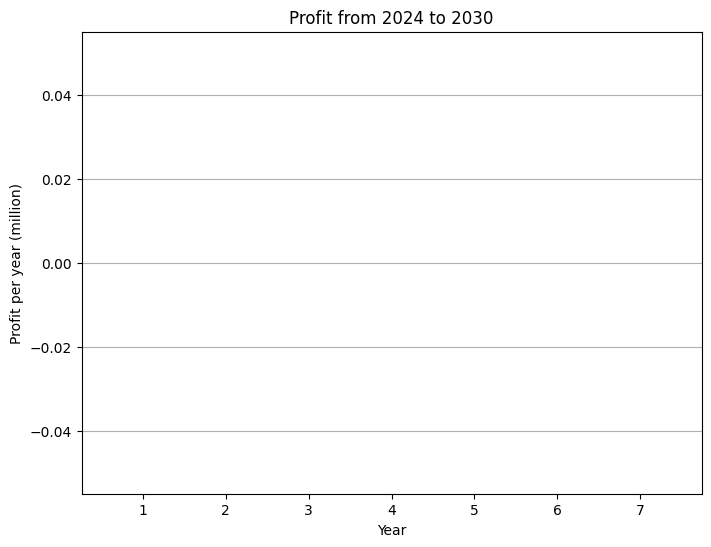

In [481]:
import numpy as np
import matplotlib.pyplot as plt
years1=[2024,2025,2026,2027,2028,2029,2030]
# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, P)
plt.xlabel('Year')
plt.ylabel('Profit per year (million)')
plt.title('Profit from 2024 to 2030')
plt.xticks(years)  # Ensure the x-axis shows each year
plt.grid(axis='y')

# Show the plot
plt.show()


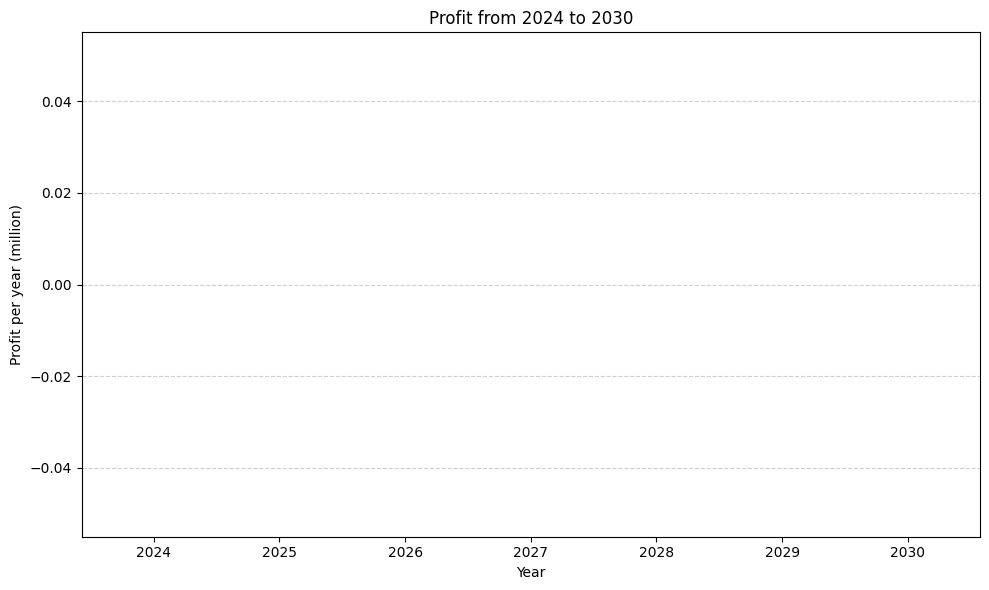

In [482]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
years = [2024, 2025, 2026, 2027, 2028, 2029, 2030]

# 创建图表
plt.figure(figsize=(10, 6),facecolor='white')

# 调整柱子的宽度（默认是 0.8，这里调为 0.5）
bars = plt.bar(years, P, color='#1f77b4', edgecolor='white',alpha=0.7, width=0.5)

# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('Profit per year (million)')
plt.title('Profit from 2024 to 2030')

# 在柱子上方添加数据标签
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# 添加细网格
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/maxdmx/anaconda3/envs/math/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/54b2c9f773174b1fbad628cf1f804e80-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/54b2c9f773174b1fbad628cf1f804e80-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 30310 COLUMNS
At line 145649 RHS
At line 175955 BOUNDS
At line 175956 ENDATA
Problem MODEL has 30305 rows, 30996 columns and 107904 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
1 infeasibilities
Analysis indicates model infeasible or unbounded
Perturbing problem by 0.001% of 265041.53 - largest nonzero change 0.24354862 ( 0.051853045%) - largest zero change 0.24354849
0  Obj -0 Primal inf 34831.8 (1712) Dual in

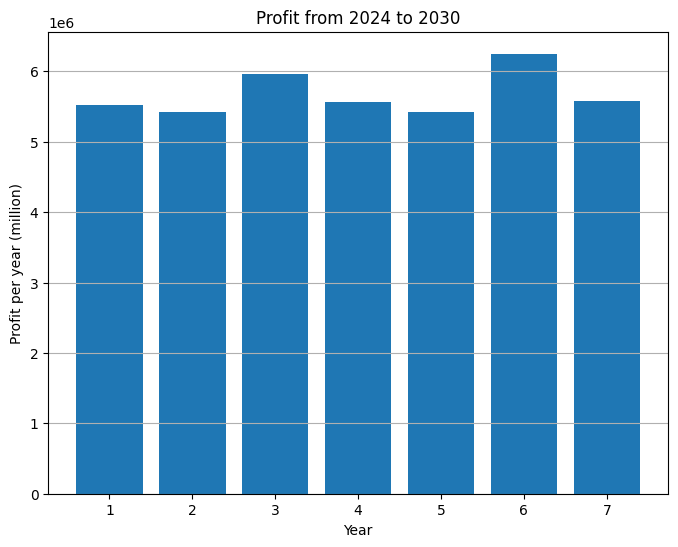

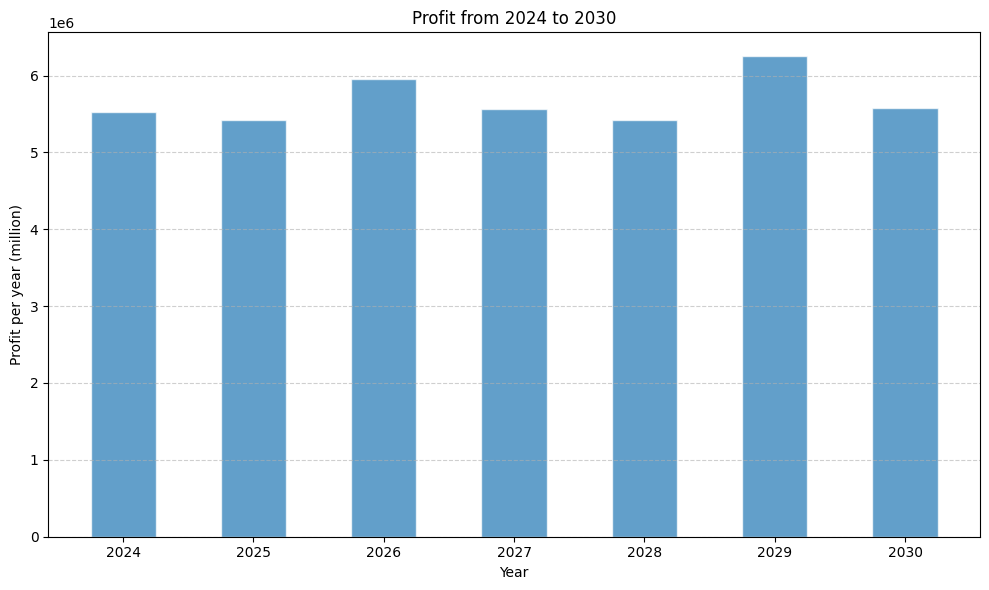

In [485]:
from pulp import LpMinimize

model = LpProblem(name="profit-optimization", sense=LpMaximize)
# 读取Excel文件
# df1 = pd.read_excel('/home/maxdmx/math-China/附件1(1).xlsx')
# column_name_1 = '地块名称'
# column_data_1 = df1[column_name_1].tolist()
# 
# df2 = pd.read_excel('/home/maxdmx/math-China/附件1(2).xlsx')
# column_name_2 = '作物名称'
# column_data_2 = df2[column_name_2].tolist()
# years = [1, 2, 3, 4, 5, 6, 7]  # 2024到2030年
# seasons = [1, 2]  # 两个种植季节
# crops = list(range(1, 42))  # 41种作物
# fields = list(range(1, 55))  # 54块地
# 
# # 定义决策变量，X[i][j][k] 表示第 i 作物在第 j 地块的第 k 季度种植面积
# X = LpVariable.dicts("X", (crops, fields, seasons, years), lowBound=0, cat='Continuous')
# df3 = pd.read_excel('/home/maxdmx/math-China/附件2(2)1.xlsx')
# 
# npyields = np.zeros((42, 55, 3))
# npcosts = np.zeros((42, 55, 3))
# # 遍历每一行并提取所需的列
# for index, row in df3.iterrows():
#     crop_id = row['作物编号']  # 提取作物编号
#     plot_type = row['地块类型']  # 提取地块类型
#     planting_season = row['种植季次']  # 提取种植季次
#     yield_per_acre = row['亩产量/斤']  # 提取亩产量
#     cost_per_acre = row['种植成本/(元/亩)']
#     if plot_type == '平旱地':
#         listtemp1 = [1, 2, 3, 4, 5, 6]
#     elif plot_type == '梯田':
#         listtemp1 = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#     elif plot_type == '山坡地':
#         listtemp1 = [21, 22, 23, 24, 25, 26]
#     elif plot_type == '水浇地':
#         listtemp1 = [27, 28, 29, 30, 31, 32, 33, 34]
#     elif plot_type == '普通大棚':
#         listtemp1 = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#     elif plot_type == '智慧大棚':
#         listtemp1 = [51, 52, 53, 54]
# 
#     if planting_season == '单季' or planting_season == '第一季':
#         ps = 1
#     else:
#         ps = 2
#     for t in listtemp1:
#         npyields[crop_id, t, ps] = yield_per_acre
#         npcosts[crop_id, t, ps] = cost_per_acre
# costs = npcosts.tolist()
# yields = npyields.tolist()
# 
# df4 = pd.read_excel('/home/maxdmx/math-China/Ec.xlsx')
# 
# column_name_3 = '作物编号'
# column_name_4 = '2023总产量'
# column_data_3 = df4[column_name_3].tolist()
# column_data_4 = df4[column_name_4].tolist()
# npexpected_sales = np.zeros(42)
# for i, j in zip(column_data_3, column_data_4):
#     npexpected_sales[i] = j
# expected_sales = npexpected_sales.tolist()
# 
# df5 = pd.read_excel('/home/maxdmx/math-China/updated_附件2(2)1.xlsx')
# column_name_5 = '作物编号'
# column_name_6 = '销售单价平均值/(元/斤)'
# column_data_5 = df5[column_name_5].tolist()
# column_data_5 = column_data_5[:-18]
# column_data_6 = df5[column_name_6].tolist()
# column_data_6 = column_data_6[:-18]
# npprices = np.zeros(42)
# for i, j in zip(column_data_5, column_data_6):
#     npprices[i] = j
# prices = npprices.tolist()
# import random

#亩产量的波动
#yields亩产量
#prices售价
#costs成本
#x亩数



# def get_fluctuation_yield(yields, c, l, s):
#     if c == 6 or c == 7:
#         yields[c][l][s] = yields[c][l][s] * (1 + random.uniform(0.855, 0.21))
#         yields1[c][l][s] = yields[c][l][s]
#         return yields[c][l][s]
#     else:
#         yields[c][l][s] = yields[c][l][s] * (1 + random.uniform(-0.855, 0.155))
#         yields1[c][l][s] = yields[c][l][s]
#         return yields[c][l][s]
# 
# 
# def get_fluctuation_cost(costs, c, l, s):
#     costs[c][l][s] = costs[c][l][s] * 1.05
#     costs1[c][l][s] = costs[c][l][s]
#     return costs[c][l][s]
# 
# 
# def get_fluctuation_prices(prices, c):
#     if c <= 37 and c >= 17:
#         prices[c] = prices[c] * 1.05
#         prices1[c] = prices[c]
#     elif c <= 40 and c >= 38:
#         prices[c] = prices[c] * (1 + random.uniform(-0.05, -0.01))
#         prices1[c] = prices[c]
# 
#     elif c == 41:
#         prices[c] = prices[c] * 0.95
#         prices1[c] = prices[c]
#     return prices[c]

years = [1,2,3,4,5,6,7] 
# 目标函数1: 滞销浪费情况下的利润最大化
model += lpSum([lpSum([lpSum([lpSum([sales1[c][l][s]*yields1[c][l][s] * X[c][l][s][y] for l in fields]) for s in seasons]) *prices1[c] - lpSum([lpSum([costs1[c][l][s] * X[c][l][s][y] for l in fields]) for s in seasons])
                       for c in crops]) for y in years])
# model += lpSum([lpSum([0.8*lpSum([lpSum([get_fluctuation_yield(yields,c,l,s) * X[c][l][s][y] for l in fields]) for s in seasons])*get_fluctuation_prices(prices,c)-lpSum([lpSum([get_fluctuation_cost(costs,c,l,s) * X[c][l][s][y] for l in fields]) for s in seasons])for c in crops])for y in years])
data = pd.read_excel('/home/maxdmx/math-China/附件1(1).xlsx')
field_areas = data['地块面积/亩'].to_numpy()
field_areas = np.insert(field_areas, 0, 0)
# 约束条件1: 作物种植面积不能超过地块总面积

for y in years:
    for s in seasons:
        for l in fields:
            model += lpSum([X[c][l][s][y] for c in crops]) <= field_areas[l]

# for y in years:
#         for c in crops:
#             model +=lpSum([lpSum([X[c][l][s][y]for s in seasons]) for l in fields]) <=260

for y in years:
    for c in crops:
        model += lpSum([lpSum([yields[c][l][s] * X[c][l][s][y] for l in fields]) for s in seasons]) <= 1.2*expected_sales[c]
# 约束条件2: 每个地块三年内至少种一次豆类作物
beans1 = [1, 2, 3, 4, 5]
for l in range(1,27):
    for y in years[:-2]:
        model += lpSum([lpSum([X[bean][l][1][y + i] for i in range(0,3)])for bean in beans1])>=field_areas[l]
beans2 = [16,17,18]
for l in range(27,55):
    for y in years[:-2]:
        model += lpSum([lpSum([lpSum([X[bean][l][s][y + i]for i in range(0,3)]) for bean in beans2]) for s in seasons])>=field_areas[l]
        
        
beans1 = [1, 2, 3, 4, 5]
for l in range(1,27):
    model += lpSum([area23[bean][l][1]+X[bean][l][1][1]+X[bean][l][1][2]for bean in beans1])>=field_areas[l]
beans2 = [16,17,18]
for l in range(27,55):
    for y in years[:-2]:
        model += lpSum([lpSum([area23[bean][l][s]+X[bean][l][s][1]+X[bean][l][s][2] for bean in beans2]) for s in seasons])>=field_areas[l]

# # 约束条件2: 每个地块三年内至少种一次豆类作物
# beans = [1, 2, 3, 4, 5, 17, 18, 19] 
# for l in fields:
#     for s in seasons:
#         for y in years[:-2]:
#             model += lpSum([X[bean][l][s][y + i] for bean in beans for i in range(3)])>=field_areas[l]


# beans = [1, 2, 3, 4, 5, 17, 18, 19]
# for l in fields:
#      model += lpSum([X[bean][l][s][y] for bean in beans for s in seasons for y in years if y in range(years[0], years[-1]+3)]) >= field_areas[l]
#约束条件4:种植面积不能太小
#定义B数组           
B = LpVariable.dicts("B", (crops, fields, seasons, years), cat='Binary')
# 
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                if X[c][l][s][y] >= 0.001:
                    B[c][l][s][y] = 1
                else:
                    B[c][l][s][y] = 0

for l in fields:
    for s in seasons:
        for y in years:
            model += lpSum([X[c][l][s][y] * B[c][l][s][y] for c in crops]) >= 0.3
# 约束条件3: 分散性约束，某个作物不能在太多地块种植
max_field_count = 6  # 每个作物每季最多种6个地块
for y in years:
    for s in seasons:
        for c in crops:
            model += lpSum([B[c][l][s][y] for l in fields]) <= max_field_count
# 约束条件5:轮作约束
# 对于平旱地
# for c in range(1,16):
#     for l in range(1,27):
#         for y in range(1,8):
#             model += X[c][l][1][y]*X[c][l][1][y+1] == 0
# #对于智慧大棚
# for c in range(1,16):
#     for l in range(51,55):
#         for y in range(1,8):
#             model += X[c][l][1][y]*X[c][l][1][y+1] +X[c][l][2][y]*X[c][l][2][y+1] == 0

# 约束条件5:轮作约束
# 对于平旱地
# for c in range(1,16):
#     for l in range(1,27):
#         for y in range(1,7):
#             model += X[c][l][1][y]+X[c][l][1][y+1] <= field_areas[l]
# # #对于智慧大棚
# for c in range(1,16):
#     for l in range(51,55):
#         for y in range(1,7):
#             model += X[c][l][1][y]+X[c][l][1][y+1] +X[c][l][2][y]+X[c][l][2][y+1] <=field_areas[l]

# 约束条件5:轮作约束
# 对于平旱地
for c in range(1,16):
    for l in range(1,27):
        for y in range(1,7):
            model += X[c][l][1][y]+X[c][l][1][y+1] <= field_areas[l]
# #对于智慧大棚
for c in range(17,35):
    for l in range(51,55):
        for y in range(1,7):
            model += X[c][l][1][y]+X[c][l][2][y+1] <=field_areas[l]
            model+=  X[c][l][2][y]+X[c][l][1][y+1] <=field_areas[l]
            model+=  X[c][l][1][y]+X[c][l][1][y+1] <=field_areas[l]

for c in range(1,16):
    for l in range(1,27):
        model += area23[c][l][1]+X[c][l][1][1] <= field_areas[l]

for c in range(17,35):
    for l in range(51,55):
        model += area23[c][l][1]+X[c][l][2][1] <=field_areas[l]
        model+=  X[c][l][2]+X[c][l][1][1] <=field_areas[l]
        model+=  X[c][l][1]+X[c][l][1][1] <=field_areas[l]

# # 对于平旱地，作物 1-15, 地块 1-26, 限制相邻年份的同一地块不种同一作物
# for c in range(1, 16):  # 作物范围
#     for l in range(1, 27):  # 地块范围
#         for y in range(1, 6):  # 年份范围，注意 y+1 不能超出范围
#             # 添加约束：相邻年份不能种植相同作物
#             model += lpSum([B[c][l][ 1][y+i] for i in (0,2) ]) <= 1
# 
# # 对于智慧大棚，作物 1-15, 地块 51-54, 限制相邻年份的同一地块不种同一作物
# for c in range(1, 16):  # 作物范围
#     for l in range(51, 55):  # 智慧大棚地块范围
#         for y in range(1, 7):  # 年份范围
#             # 添加约束：相邻年份的任一季节不能种植相同作物
#             model += lpSum([B[c][l][ s][y] for s in seasons ]) <= 1

# 种植类别约束
# 对于平旱地，梯田，山坡:
for c in range(1, 16):
    for l in range(1, 27):
        for y in years:
            model += X[c][l][2][y] == 0

for c in range(17, 42):
    for l in range(1, 27):
        for s in range(1, 3):
            for y in years:
                model += X[c][l][s][y] == 0

            # 对于水浇地:
for l in range(27, 35):
    for y in years:
        for c in range(1, 17):
            model += X[c][l][1][y] == 0
        for c in range(35, 42):
            model += X[c][l][1][y] == 0
        for c in range(1, 35):
            model += X[c][l][2][y] == 0
        for c in range(38, 42):
            model += X[c][l][2][y] == 0
#对于普通大棚类:
for l in range(35, 51):
    for y in years:
        for c in range(1, 17):
            model += X[c][l][1][y] == 0
        for c in range(35, 42):
            model += X[c][l][1][y] == 0
        for c in range(1, 38):
            model += X[c][l][2][y] == 0
#对于智慧大棚类:
for l in range(51, 55):
    for s in range(1, 3):
        for y in years:
            for c in range(1, 17):
                model += X[c][l][s][y] == 0
            for c in range(35, 42):
                model += X[c][l][s][y] == 0
            # for l in range(0,55):
#     for s in range(0,3):
#         for y in range(0,8):
#             model += X[0][l][s][y]==0
# for c in range(0,42):
#     for s in range(0,3):
#         for y in range(0,8):
#             model += X[c][0][s][y]==0
# for l in range(0,55):
#     for c in range(0,42):
#         for y in range(0,8):
#             model += X[c][l][0][y]==0
# for l in range(0,55):
#     for s in range(0,3):
#         for c in range(0,42):
#             model += X[0][l][s][0]==0
model.solve()
# 假设 crops, fields, seasons, years 是已定义的作物、地块、季节和年份集合
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                # 打印变量名称和求解后的值
                print(f"X[{c}][{l}][{s}][{y}] = {X[c][l][s][y].varValue}")

array_4d = [[[[0 for y in range(1, 8)] for s in range(1, 3)] for l in range(1, 55)] for c in range(1, 42)]
for c in crops:
    for l in fields:
        for s in seasons:
            for y in years:
                array_4d[c - 1][l - 1][s - 1][y - 1] = X[c][l][s][y].varValue
array_4d = np.array(array_4d)

arr_transposed = np.transpose(array_4d, (3, 2, 1, 0))


P = np.zeros((7))
for y in years:
    for c in crops:
        sales = 0
        for s in seasons:
            for l in fields:
                # 计算每个作物的销售量和利润
                sales += 0.8 * yields[c][l][s] * array_4d[c - 1][l - 1][s - 1][y - 1]
        Cost = 0
        for s in seasons:
            for l in fields:
                Cost += costs[c][l][s] * array_4d[c - 1][l - 1][s - 1][y - 1]
        P[y - 1] += sales * prices[c] - Cost
print(P)
import numpy as np
import matplotlib.pyplot as plt

years1 = [2024, 2025, 2026, 2027, 2028, 2029, 2030]
# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(years, P)
plt.xlabel('Year')
plt.ylabel('Profit per year (million)')
plt.title('Profit from 2024 to 2030')
plt.xticks(years)  # Ensure the x-axis shows each year
plt.grid(axis='y')

# Show the plot
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# 示例数据
years = [2024, 2025, 2026, 2027, 2028, 2029, 2030]

# 创建图表
plt.figure(figsize=(10, 6), facecolor='white')

# 调整柱子的宽度（默认是 0.8，这里调为 0.5）
bars = plt.bar(years, P, color='#1f77b4', edgecolor='white', alpha=0.7, width=0.5)

# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('Profit per year (million)')
plt.title('Profit from 2024 to 2030')

# 在柱子上方添加数据标签
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# 添加细网格
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()


In [489]:

array_3d = arr_transposed[4, :, :, :]
array_2d = array_3d.reshape((54 * 2, 41))
# 将 numpy 数组转换为 pandas DataFrame
df = pd.DataFrame(array_2d)

# 将 DataFrame 写入 Excel 文件的 sheet1
df.to_excel('output5.xlsx', sheet_name='Sheet1', index=False)
print("数据已写入 Excel 文件")

数据已写入 Excel 文件


In [500]:
years=[1,2,3,4,5,6,7]
for y in years:
    SUM=0
    for l in fields:
        SUM+=array_4d[20][l-1][0][y-1]
    print(SUM)

17.857540300000004
19.373944700000003
17.230275693000003
17.73482222
19.3694172
17.758442390000003
18.069252360000004
